In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Daylio_Abid.csv", sep=",")

In [3]:
df

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful
...,...,...,...,...,...,...,...
935,04/02/2018,Feb-04,Sunday,8:19 pm,yolo,Write dairy | walk | meditation | Audio book...,Good
936,04/02/2018,Feb-04,Sunday,11:23 am,meh,meditation | youtube | research,Normal
937,04/02/2018,Feb-04,Sunday,6:34 am,blessed,prayer | good meal | youtube | movies,Good
938,03/02/2018,Feb-03,Saturday,7:52 pm,angry,Write dairy | Dota 2 | streaming | shopping,Awful


# I . Data Preparation:

---------------------------------------

In [4]:
df.head()

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful


In [5]:
df.shape

(940, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   full_date   940 non-null    object
 1   date        940 non-null    object
 2   weekday     940 non-null    object
 3   time        940 non-null    object
 4   sub_mood    940 non-null    object
 5   activities  893 non-null    object
 6   mood        940 non-null    object
dtypes: object(7)
memory usage: 51.5+ KB


In [7]:
df.describe(include = 'all')

,full_date,date,weekday,time,sub_mood,activities,mood
count,940,940,940,940,940,893,940
unique,775,366,7,425,22,839,5
top,07/02/2018,Mar-01,Tuesday,9:00 pm,blessed,Dota 2 | streaming | youtube,Good
freq,4,7,139,65,174,10,487


In [8]:
df.mood.value_counts()

Good       487
Normal     186
Amazing    167
Awful       51
Bad         49
Name: mood, dtype: int64

In [9]:
df.weekday.value_counts()

Tuesday      139
Wednesday    139
Sunday       135
Monday       134
Thursday     131
Saturday     131
Friday       131
Name: weekday, dtype: int64

In [10]:
df["mood"].value_counts()

Good       487
Normal     186
Amazing    167
Awful       51
Bad         49
Name: mood, dtype: int64

         ---------------------

In [11]:
df

,full_date,date,weekday,time,sub_mood,activities,mood
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful
...,...,...,...,...,...,...,...
935,04/02/2018,Feb-04,Sunday,8:19 pm,yolo,Write dairy | walk | meditation | Audio book...,Good
936,04/02/2018,Feb-04,Sunday,11:23 am,meh,meditation | youtube | research,Normal
937,04/02/2018,Feb-04,Sunday,6:34 am,blessed,prayer | good meal | youtube | movies,Good
938,03/02/2018,Feb-03,Saturday,7:52 pm,angry,Write dairy | Dota 2 | streaming | shopping,Awful


In [12]:
df.isnull().sum()

full_date      0
date           0
weekday        0
time           0
sub_mood       0
activities    47
mood           0
dtype: int64

In [13]:
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

In [14]:
df.isnull().sum()

full_date     0
date          0
weekday       0
time          0
sub_mood      0
activities    0
mood          0
dtype: int64

In [15]:
df['activities'].values
a = [[w.strip().lower() for w in word.split('|')]
     for word in df['activities'].astype(str)]
print(a)

[['reading', 'art', 'prayer', 'fasting', 'walk', 'meditation', 'shower', 'writing', 'watching series', 'good meal', 'reddit', 'language learning', 'streaming', 'youtube', 'cooking', 'travel', 'cleaning', 'new things', 'power nap', 'documentary', 'penpal', 'coding'], ['reading', 'learning', 'art', 'prayer', 'fasting', 'walk', 'meditation', 'shower', 'audio books', 'writing', 'watching series', 'good meal', 'reddit', 'language learning', 'shave', 'streaming', 'youtube', 'cooking', 'cleaning', 'research', 'new things', 'power nap', 'repair', 'documentary', 'penpal', 'coding', 'tutorial'], ['reading', 'learning', 'prayer', 'fasting', 'quran', 'walk', 'meditation', 'shower', 'podcast', 'audio books', 'writing', 'watching series', 'good meal', 'reddit', 'language learning', 'streaming', 'youtube', 'cooking', 'research', 'new things', 'designing', 'repair', 'documentary', 'penpal', 'coding', 'tutorial'], ['reading', 'learning', 'art', 'prayer', 'fasting', 'walk', 'meditation', 'audio books', 

In [16]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(a).transform(a)   
p=pd.DataFrame(te_ary, columns=te.columns_)

p

,art,audio books,cleaning,coding,cooking,designing,documentary,dota 2,email,exercise,...,trimming,tutorial,video editing,walk,watching series,weight log,write dairy,writing,yoga,youtube
0,True,False,True,True,True,False,True,False,False,False,...,False,False,False,True,True,False,False,True,False,True
1,True,True,True,True,True,False,True,False,False,False,...,False,True,False,True,True,False,False,True,False,True
2,False,True,False,True,True,True,True,False,False,False,...,False,True,False,True,True,False,False,True,False,True
3,True,True,False,True,True,False,True,False,False,False,...,False,True,False,True,True,False,False,True,False,True
4,False,False,True,True,True,False,True,False,False,False,...,False,True,False,True,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,True
889,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
890,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
891,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False


In [17]:
df[p.columns] = p
df.head()

,full_date,date,weekday,time,sub_mood,activities,mood,art,audio books,cleaning,...,trimming,tutorial,video editing,walk,watching series,weight log,write dairy,writing,yoga,youtube
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,True,False,True,...,False,False,False,True,True,False,False,True,False,True
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,True,True,True,...,False,True,False,True,True,False,False,True,False,True
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,False,True,False,...,False,True,False,True,True,False,False,True,False,True
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,True,True,False,...,False,True,False,True,True,False,False,True,False,True
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,False,False,True,...,False,True,False,True,True,False,False,True,False,True


In [18]:
from sklearn.preprocessing import LabelEncoder
p.columns_le = LabelEncoder()
for col in p.columns:
    df[col] =p.columns_le.fit_transform(df[col])
df

,full_date,date,weekday,time,sub_mood,activities,mood,art,audio books,cleaning,...,trimming,tutorial,video editing,walk,watching series,weight log,write dairy,writing,yoga,youtube
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,1,0,1,...,0,0,0,1,1,0,0,1,0,1
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,1,1,1,...,0,1,0,1,1,0,0,1,0,1
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,0,1,0,...,0,1,0,1,1,0,0,1,0,1
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,1,1,0,...,0,1,0,1,1,0,0,1,0,1
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,0,0,1,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,04/02/2018,Feb-04,Sunday,8:19 pm,yolo,Write dairy | walk | meditation | Audio book...,Good,2,2,2,...,2,2,2,2,2,2,2,2,2,2
936,04/02/2018,Feb-04,Sunday,11:23 am,meh,meditation | youtube | research,Normal,2,2,2,...,2,2,2,2,2,2,2,2,2,2
937,04/02/2018,Feb-04,Sunday,6:34 am,blessed,prayer | good meal | youtube | movies,Good,2,2,2,...,2,2,2,2,2,2,2,2,2,2
938,03/02/2018,Feb-03,Saturday,7:52 pm,angry,Write dairy | Dota 2 | streaming | shopping,Awful,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [19]:
df

,full_date,date,weekday,time,sub_mood,activities,mood,art,audio books,cleaning,...,trimming,tutorial,video editing,walk,watching series,weight log,write dairy,writing,yoga,youtube
0,16/04/2021,Apr-16,Friday,8:00 pm,yolo,reading | Art | prayer | fasting | walk | med...,Good,1,0,1,...,0,0,0,1,1,0,0,1,0,1
1,15/04/2021,Apr-15,Thursday,2:37 am,focused,reading | learning | Art | prayer | fasting ...,Good,1,1,1,...,0,1,0,1,1,0,0,1,0,1
2,14/04/2021,Apr-14,Wednesday,2:39 am,confused,reading | learning | prayer | fasting | Qura...,Normal,0,1,0,...,0,1,0,1,1,0,0,1,0,1
3,13/04/2021,Apr-13,Tuesday,2:38 am,wondering,reading | learning | Art | prayer | fasting ...,Normal,1,1,0,...,0,1,0,1,1,0,0,1,0,1
4,12/04/2021,Apr-12,Monday,9:52 pm,angry,reading | learning | fasting | walk | medita...,Awful,0,0,1,...,0,1,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,04/02/2018,Feb-04,Sunday,8:19 pm,yolo,Write dairy | walk | meditation | Audio book...,Good,2,2,2,...,2,2,2,2,2,2,2,2,2,2
936,04/02/2018,Feb-04,Sunday,11:23 am,meh,meditation | youtube | research,Normal,2,2,2,...,2,2,2,2,2,2,2,2,2,2
937,04/02/2018,Feb-04,Sunday,6:34 am,blessed,prayer | good meal | youtube | movies,Good,2,2,2,...,2,2,2,2,2,2,2,2,2,2
938,03/02/2018,Feb-03,Saturday,7:52 pm,angry,Write dairy | Dota 2 | streaming | shopping,Awful,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

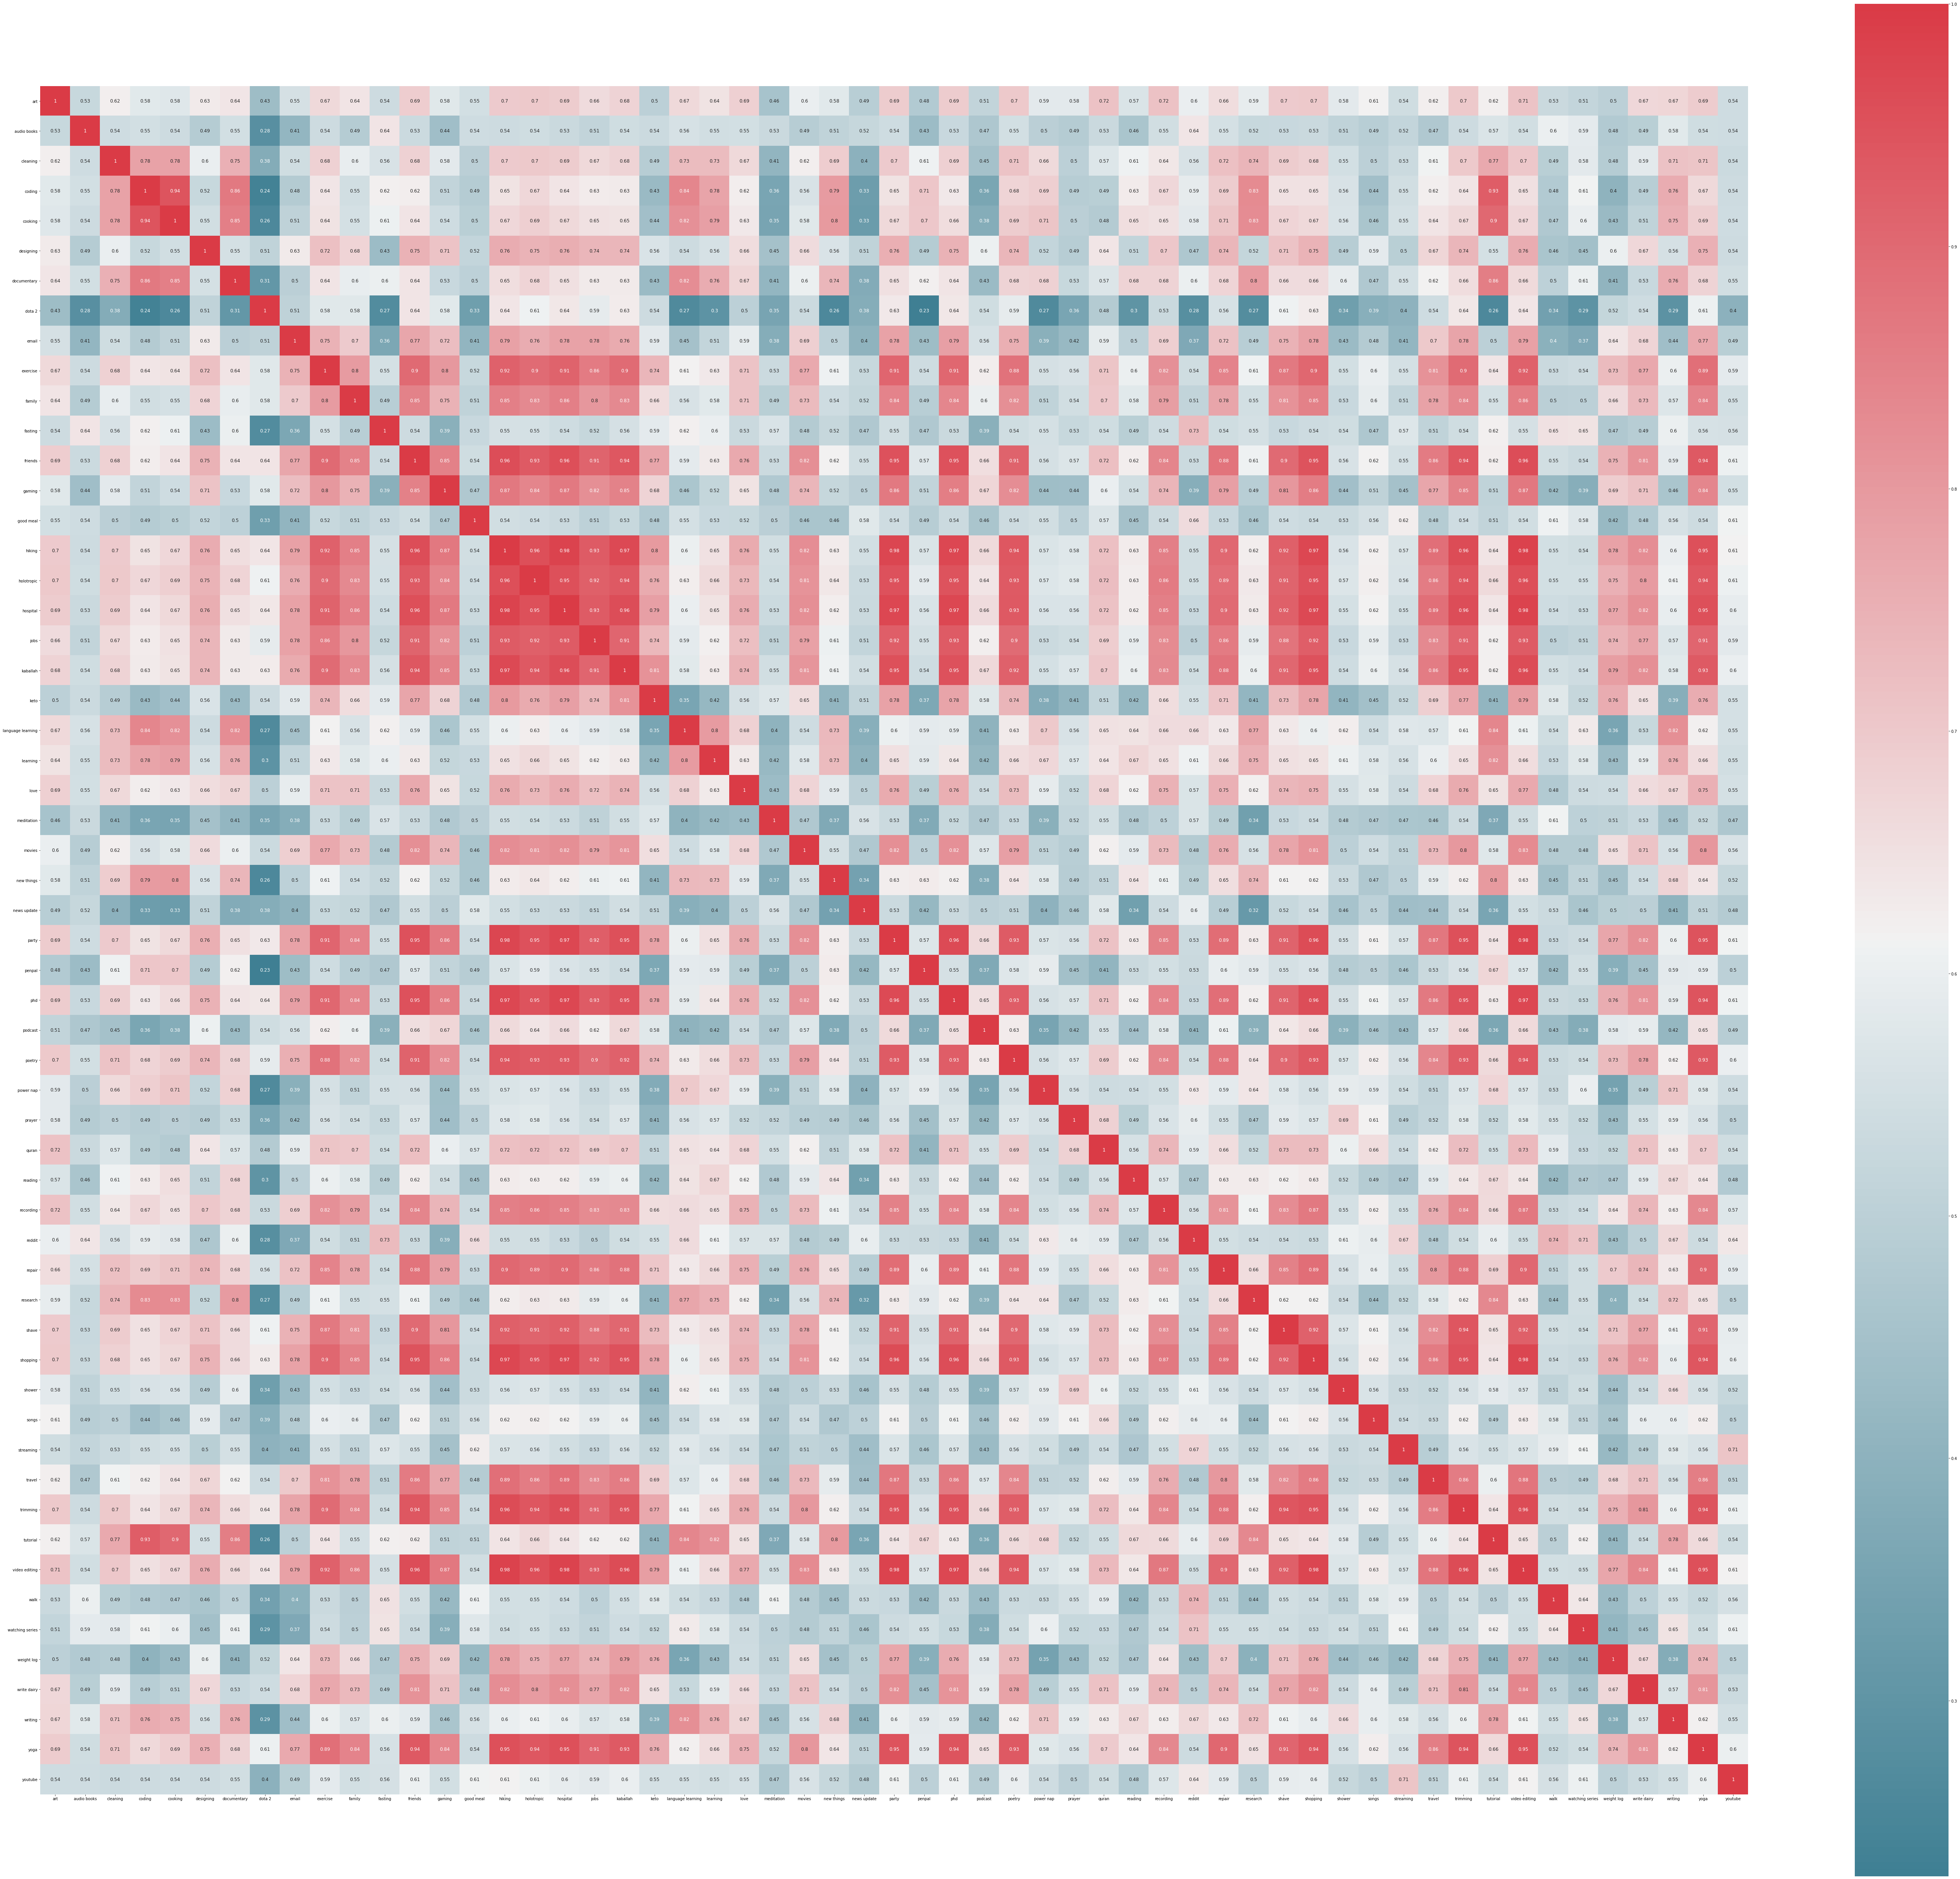

In [21]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 100 , 100 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

    
plot_correlation_map( df )

# II . Data Visualization:

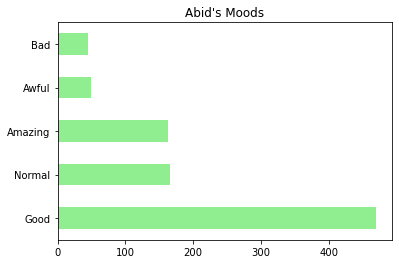

In [22]:
df["mood"].value_counts()[:15].plot.barh(color='lightgreen', title="Abid's Moods");

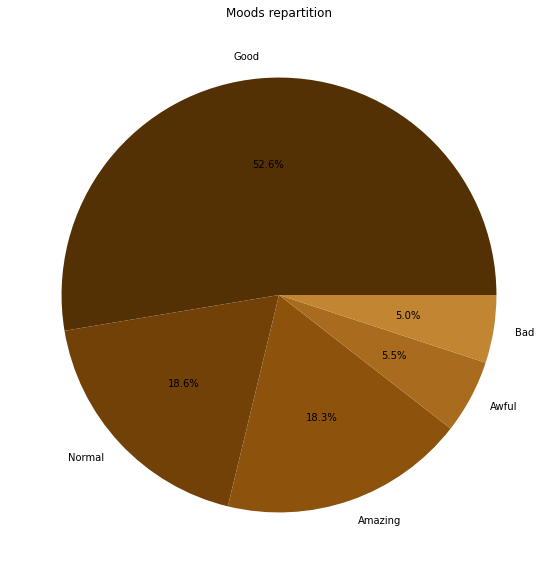

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
color = plt.cm.BrBG(np.linspace(0,1,20))
df["mood"].value_counts().sort_values(ascending=False).head(20).plot.pie(y="date",colors=color,autopct="%0.1f%%")
plt.title("Moods repartition")
plt.axis("off")
plt.show()

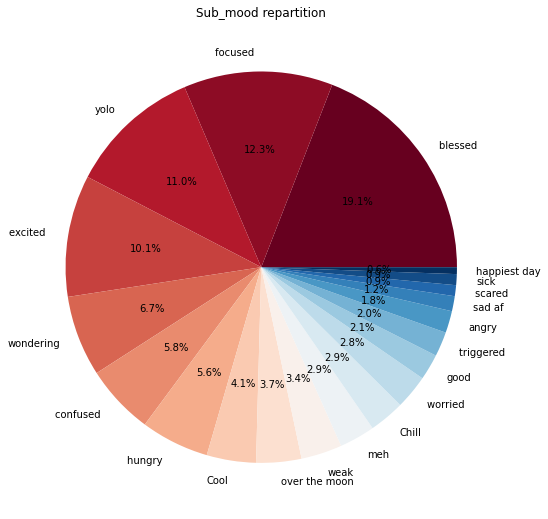

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,9))
color = plt.cm.RdBu(np.linspace(0,1,20))
df["sub_mood"].value_counts().sort_values(ascending=False).head(20).plot.pie(y="date",colors=color,autopct="%0.1f%%")
plt.title("Sub_mood repartition")
plt.axis("off")
plt.show()

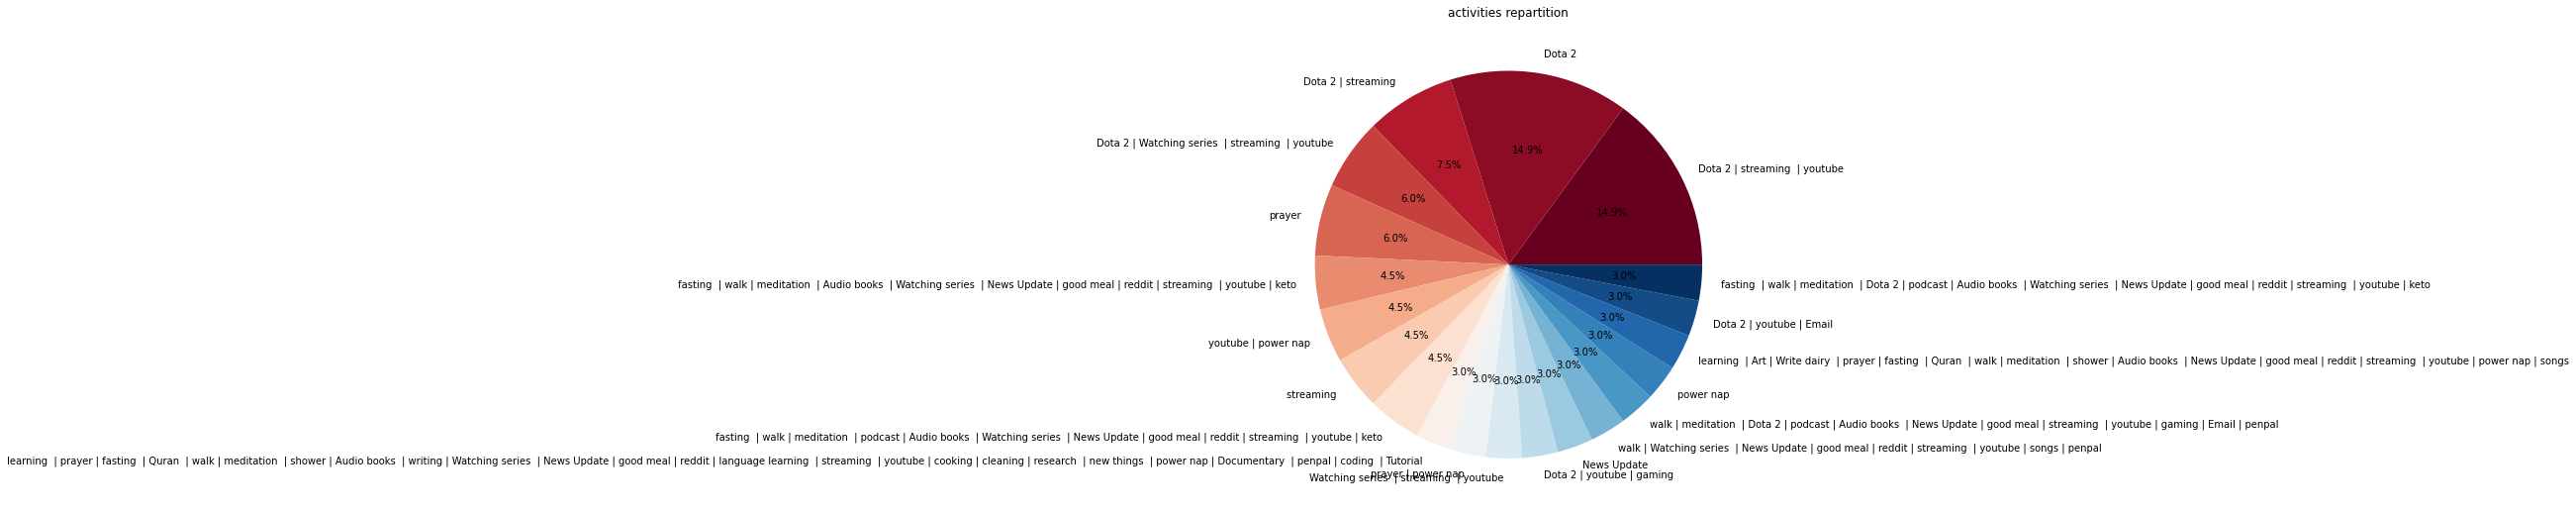

In [25]:

fig, ax = plt.subplots(figsize=(9,9))
color = plt.cm.RdBu(np.linspace(0,1,20))
df["activities"].value_counts().sort_values(ascending=False).head(20).plot.pie(y="date",colors=color,autopct="%0.1f%%")
plt.title("activities repartition")
plt.axis("off")
plt.show()

In [26]:
import seaborn as sns

In [27]:

weekday_le = LabelEncoder()
df["weekday"] = weekday_le.fit_transform(df["weekday"]) 

<AxesSubplot:xlabel='weekday', ylabel='mood'>

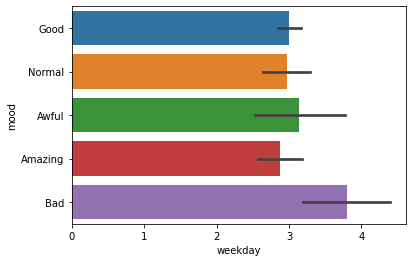

In [28]:
sns.barplot(x=df['weekday'],y=df['mood'])

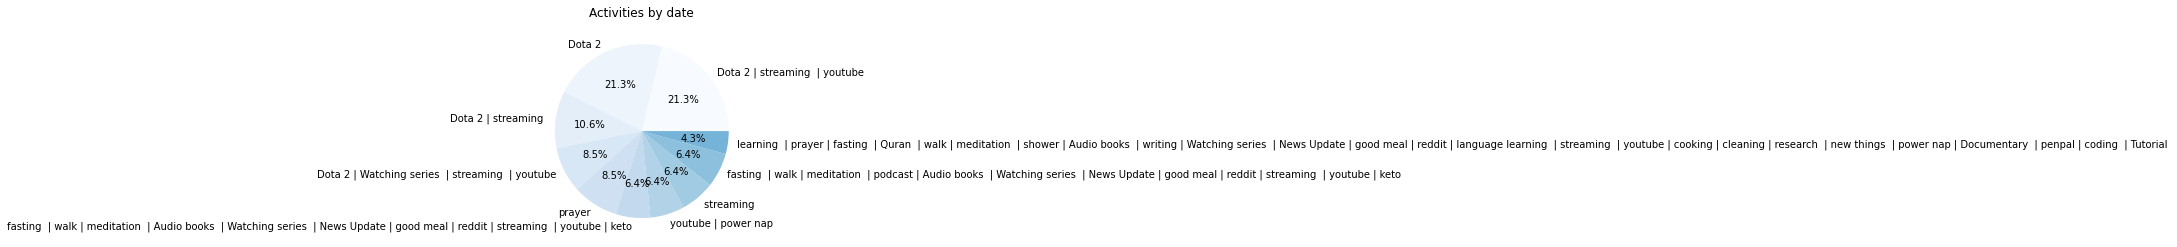

In [29]:
color = plt.cm.Blues(np.linspace(0,1,20))
df["activities"].value_counts().sort_values(ascending=False).head(10).plot.pie(y="date",colors=color,autopct="%0.1f%%")
plt.title("Activities by date")
plt.axis("off")
plt.show()

                ---------------------

In [30]:
from sklearn.preprocessing import LabelEncoder
mood_le = LabelEncoder()
df["mood"] = mood_le.fit_transform(df["mood"])
weekday_le = LabelEncoder()
df["weekday"] = weekday_le.fit_transform(df["weekday"]) 

In [31]:
sub_mood_le = LabelEncoder()
df["sub_mood"] = sub_mood_le.fit_transform(df["sub_mood"])
activities_le = LabelEncoder()
df["actvities"] = activities_le.fit_transform(df["activities"])

In [32]:
df

,full_date,date,weekday,time,sub_mood,activities,mood,art,audio books,cleaning,...,tutorial,video editing,walk,watching series,weight log,write dairy,writing,yoga,youtube,actvities
0,16/04/2021,Apr-16,0,8:00 pm,21,reading | Art | prayer | fasting | walk | med...,3,1,0,1,...,0,0,1,1,0,0,1,0,1,529
1,15/04/2021,Apr-15,4,2:37 am,8,reading | learning | Art | prayer | fasting ...,3,1,1,1,...,1,0,1,1,0,0,1,0,1,616
2,14/04/2021,Apr-14,6,2:39 am,6,reading | learning | prayer | fasting | Qura...,4,0,1,0,...,1,0,1,1,0,0,1,0,1,674
3,13/04/2021,Apr-13,5,2:38 am,19,reading | learning | Art | prayer | fasting ...,4,1,1,0,...,1,0,1,1,0,0,1,0,1,609
4,12/04/2021,Apr-12,1,9:52 pm,2,reading | learning | fasting | walk | medita...,1,0,0,1,...,1,0,1,1,0,0,1,0,1,651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,04/02/2018,Feb-04,3,8:19 pm,21,Write dairy | walk | meditation | Audio book...,3,2,2,2,...,2,2,2,2,2,2,2,2,2,145
936,04/02/2018,Feb-04,3,11:23 am,12,meditation | youtube | research,4,2,2,2,...,2,2,2,2,2,2,2,2,2,367
937,04/02/2018,Feb-04,3,6:34 am,5,prayer | good meal | youtube | movies,3,2,2,2,...,2,2,2,2,2,2,2,2,2,463
938,03/02/2018,Feb-03,2,7:52 pm,2,Write dairy | Dota 2 | streaming | shopping,1,2,2,2,...,2,2,2,2,2,2,2,2,2,122


In [38]:
if 'full_date' in df.columns:
    df.drop('full_date', axis=1, inplace=True)
if 'date' in df.columns :
    df.drop('date', axis=1, inplace=True)
if 'time' in df.columns:
    df.drop('time', axis=1, inplace=True)

In [39]:
df

,weekday,sub_mood,mood,art,audio books,cleaning,coding,cooking,designing,documentary,...,tutorial,video editing,walk,watching series,weight log,write dairy,writing,yoga,youtube,actvities
0,0,21,3,1,0,1,1,1,0,1,...,0,0,1,1,0,0,1,0,1,529
1,4,8,3,1,1,1,1,1,0,1,...,1,0,1,1,0,0,1,0,1,616
2,6,6,4,0,1,0,1,1,1,1,...,1,0,1,1,0,0,1,0,1,674
3,5,19,4,1,1,0,1,1,0,1,...,1,0,1,1,0,0,1,0,1,609
4,1,2,1,0,0,1,1,1,0,1,...,1,0,1,1,0,0,1,0,1,651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,3,21,3,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,145
936,3,12,4,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,367
937,3,5,3,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,463
938,2,2,1,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,122


# III . Choosing the right algorithm:

# KNN

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x = df.loc[:, df.columns !='mood']
y = df['mood']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=30) 

knn=KNeighborsClassifier(n_neighbors=20) 
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test) 
print('Acuracy=',accuracy_score(y_pred,y_test))

Acuracy= 0.5223214285714286


In [41]:
n_neighbors=10
scores=[]
for k in range(1,10):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 0.51
Accuracy for k= 2 is: 0.52
Accuracy for k= 3 is: 0.51
Accuracy for k= 4 is: 0.51
Accuracy for k= 5 is: 0.51
Accuracy for k= 6 is: 0.51
Accuracy for k= 7 is: 0.52
Accuracy for k= 8 is: 0.53
Accuracy for k= 9 is: 0.53


Text(0, 0.5, 'Testing Accuracy')

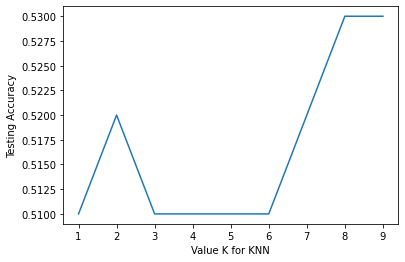

In [42]:
import matplotlib.pyplot as plt
x = df.loc[:, df.columns !='mood']
y = df['mood']
plt.plot(range(1,10),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

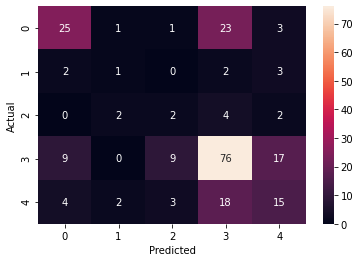

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [44]:
df

,weekday,sub_mood,mood,art,audio books,cleaning,coding,cooking,designing,documentary,...,tutorial,video editing,walk,watching series,weight log,write dairy,writing,yoga,youtube,actvities
0,0,21,3,1,0,1,1,1,0,1,...,0,0,1,1,0,0,1,0,1,529
1,4,8,3,1,1,1,1,1,0,1,...,1,0,1,1,0,0,1,0,1,616
2,6,6,4,0,1,0,1,1,1,1,...,1,0,1,1,0,0,1,0,1,674
3,5,19,4,1,1,0,1,1,0,1,...,1,0,1,1,0,0,1,0,1,609
4,1,2,1,0,0,1,1,1,0,1,...,1,0,1,1,0,0,1,0,1,651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,3,21,3,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,145
936,3,12,4,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,367
937,3,5,3,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,463
938,2,2,1,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,122


In [45]:
x = df.loc[:, df.columns !='mood']
y = df['mood']


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) 

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
model = KNeighborsClassifier()

In [49]:
from sklearn.neighbors import DistanceMetric

In [50]:
dist = [DistanceMetric.get_metric('euclidean')]
dist

In [51]:
distancemetric = ['euclidean','manhattan','minkowski']
dist = [DistanceMetric.get_metric(m) for m in distancemetric]
dist

In [52]:
v = GridSearchCV(model, param_grid={"n_neighbors":[i for i in range(1, 10)], "metric":["euclidean",'manhattan','minkowski']})

v.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [53]:
print(v.score(x_test,y_test))
v.best_params_

0.5586592178770949


{'metric': 'manhattan', 'n_neighbors': 9}

In [54]:
e = GridSearchCV(model, param_grid={"n_neighbors":[i for i in range(1, 30)], "metric":["euclidean",'manhattan','minkowski']})

e.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]})

In [55]:
print(e.score(x_test,y_test))
e.best_params_

0.5810055865921788


{'metric': 'manhattan', 'n_neighbors': 12}

In [56]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics 

In [57]:
clf=RandomForestClassifier(n_estimators=10) 
clf.fit(x_train, y_train) 
y_pred=clf.predict(x_test) 
print("Accuracy:", metrics.accuracy_score(y_test, y_pred)) 

Accuracy: 0.659217877094972


In [58]:
t = GridSearchCV(RandomForestClassifier(), param_grid={"n_estimators":[i for i in range(1, 30)]})

t.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29]})

In [59]:
 print(t.score(x_test,y_test))
t.best_params_

0.6759776536312849


{'n_estimators': 28}

In [60]:
a = GridSearchCV(RandomForestClassifier(), param_grid={
    "n_estimators":[i for i in range(1, 30)],
    "max_leaf_nodes":[i for i in range(1, 50)]
                      })

a.fit(x_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\hp\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.65825864 0.64845858 0.64006698]
  warnings.warn(


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...],
                         'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29]})

In [61]:
 print(a.score(x_test,y_test))
a.best_params_

0.5977653631284916


{'max_leaf_nodes': 47, 'n_estimators': 11}

In [ ]:
def mood(model,):
    